In [1]:
# Imported libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import mean_absolute_error,make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import statsmodels.api as sm

In [2]:
# Read all university data files, made all column names same to pass the data
sr_df_list = list()
for fname in glob.glob("C:\\Users\\priya\\OneDrive\\Documents\\New-Sweat-rate\\*.csv"):
    trial_data_hr = pd.read_csv(fname)
    column = trial_data_hr.columns
    for i in column:
         if i =='SweatRate':
            trial_data_hr.rename(columns={'SweatRate' : 'Sweat_Rate'},inplace=True)
    sr_df_list.append(trial_data_hr[['SubjectId','DateTime', 'Source', 'Trial', 'Age','Sex', 'Weight', 'Height', 'Trial Type', 'Sweat_Rate', 'Tamb','RH']])
sr_df = pd.concat(sr_df_list,ignore_index=True)

In [3]:
# Stored in csv
sr_df.to_csv("C:\\Users\\priya\\OneDrive\\Documents\\new-SweatRate.csv", index=False)

In [4]:
# Read from a csv
sr = pd.read_csv("C:\\Users\\priya\\OneDrive\\Documents\\new-SweatRate.csv")

In [5]:
# Changed type to categorical
sr['Sex'] = sr['Sex'].astype('category')

In [6]:
# Converted Sex varible to Binary Encoding
sr['Sex'] = sr['Sex'].replace({'Male':1,'Male ':1,'M':1,'F':0})

In [7]:
# Changed SubjectId to string data type
sr['SubjectId'] = sr['SubjectId'].astype('str')

In [8]:
# Unique subject ids in the dataframe
sr.SubjectId.unique()

array(['500', '501', '502', '503', '505', '506', '507', '508', '510',
       'P01', 'P02', 'P03', 'PP01', 'PP02', 'PP03', 'PP04', 'PP05',
       'PP06', 'PP07', 'PP08'], dtype=object)

In [9]:
#  Dataframe shape
sr.shape

(220141, 12)

In [10]:
# Concatenated source, trial and SubjectId columns to create ID column
sr['ID'] =  sr['Source'] + "_" + sr['Trial'] + "_" + sr['SubjectId'].astype('str')

In [11]:
# Checked the first 10 rows to see all columns
sr.head(10)

SubjectId             DateTime       Source Trial  Age  Sex  Weight  Height  \
0       500  2020-10-02 14:07:00  Weber State   BBC   22    0    72.6   170.0   
1       500  2020-10-02 14:07:01  Weber State   BBC   22    0    72.6   170.0   
2       500  2020-10-02 14:07:02  Weber State   BBC   22    0    72.6   170.0   
3       500  2020-10-02 14:07:03  Weber State   BBC   22    0    72.6   170.0   
4       500  2020-10-02 14:07:04  Weber State   BBC   22    0    72.6   170.0   
5       500  2020-10-02 14:07:05  Weber State   BBC   22    0    72.6   170.0   
6       500  2020-10-02 14:07:06  Weber State   BBC   22    0    72.6   170.0   
7       500  2020-10-02 14:07:07  Weber State   BBC   22    0    72.6   170.0   
8       500  2020-10-02 14:07:08  Weber State   BBC   22    0    72.6   170.0   
9       500  2020-10-02 14:07:09  Weber State   BBC   22    0    72.6   170.0   

  Trial Type  Sweat_Rate  Tamb    RH                   ID  
0   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
1   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
2   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
3   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
4   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
5   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
6   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
7   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
8   Exercise    0.726102  27.6  13.2  Weber State_BBC_500  
9   Exercise    0.726102  27.6  13.2  Weber State_BBC_500

In [12]:
# Considered only first row from each dataset
sr_df =sr.groupby('ID').first().reset_index()

In [13]:
# Shape of the new dataframe
sr_df.shape

(45, 13)

In [14]:
# Trial Types under consideration
sr_df["Trial Type"].value_counts()

Exercise           31
Passive Heating    14
Name: Trial Type, dtype: int64

In [15]:
# Min and max sweat rate by ID
result = sr_df.groupby('ID').agg({'Sweat_Rate': ['min', 'max']}) 
result 

Sweat_Rate          
                                              min       max
ID                                                         
Massey Probiotics_Familiarization_PP04   1.172000  1.172000
Massey Probiotics_Familiarization_PP05   1.235900  1.235900
Massey Probiotics_Familiarization_PP07   1.210000  1.210000
Massey Probiotics_Phase A_PP01           1.000000  1.000000
Massey Probiotics_Phase A_PP02           1.300000  1.300000
Massey Probiotics_Phase A_PP03           1.600000  1.600000
Massey Probiotics_Phase A_PP05           1.350800  1.350800
Massey Probiotics_Phase A_PP06           1.508000  1.508000
Massey Probiotics_Phase A_PP07           1.347000  1.347000
Massey Probiotics_Phase A_PP08           1.028800  1.028800
Massey Probiotics_Phase B_PP01           1.200000  1.200000
Massey Probiotics_Phase B_PP03           1.440000  1.440000
Massey Probiotics_Phase B_PP06           1.480400  1.480400
Massey Probiotics_Phase B_PP07           1.400000  1.400000
Massey Probiotics_Phase B_PP08           1.194000  1.194000
UnivofSydney SRV_20A_P01                 1.100000  1.100000
UnivofSydney SRV_20A_P02                 0.890000  0.890000
UnivofSydney SRV_20A_P03                 0.880000  0.880000
UnivofSydney SRV_20B_P03                 0.870000  0.870000
UnivofSydney SRV_35A_P01                 1.030000  1.030000
UnivofSydney SRV_35A_P02                 0.670000  0.670000
UnivofSydney SRV_35A_P03                 0.580000  0.580000
UnivofSydney SRV_35B_P03                 0.620000  0.620000
UnivofSydney SRV_50A_P01                 0.420000  0.420000
UnivofSydney SRV_50A_P02                 0.490000  0.490000
UnivofSydney SRV_50A_P03                 0.420000  0.420000
UnivofSydney SRV_50B_P03                 0.450000  0.450000
Weber State_BBC_500                      0.726102  0.726102
Weber State_BBC_501                      1.061143  1.061143
Weber State_BBC_502                      0.061690  0.061690
Weber State_BBC_505                      0.320000  0.320000
Weber State_BBC_506                      0.170909  0.170909
Weber State_BBC_507                      1.166667  1.166667
Weber State_CWI_500                      1.118049  1.118049
Weber State_CWI_501                      1.298438  1.298438
Weber State_CWI_502                      0.459200  0.459200
Weber State_CWI_503                           NaN       NaN
Weber State_CWI_505                      0.336522  0.336522
Weber State_CWI_508                      0.390448  0.390448
Weber State_TACO_500                     0.680000  0.680000
Weber State_TACO_501                     1.560845  1.560845
Weber State_TACO_502                          NaN       NaN
Weber State_TACO_505                     0.645818  0.645818
Weber State_TACO_508                          NaN       NaN
Weber State_TACO_510                     0.537429  0.537429

In [16]:
# Missing values in data
print("Missing value in the dataset : ",sr_df.isnull().sum())

Missing value in the dataset :  ID            0
SubjectId     0
DateTime      0
Source        0
Trial         0
Age           0
Sex           0
Weight        0
Height        0
Trial Type    0
Sweat_Rate    3
Tamb          0
RH            0
dtype: int64


In [17]:
# Checked missing values by ID
sr_df[sr_df.Sweat_Rate.isna()==True]['ID'].value_counts()

Weber State_TACO_508    1
Weber State_TACO_502    1
Weber State_CWI_503     1
Name: ID, dtype: int64

In [18]:
# Removed NaNs from sweat rate
sr_df.dropna(subset=["Sweat_Rate"], inplace=True)

In [19]:
# No missing values
print("Missing value in the dataset : ",sr_df.isnull().sum())

Missing value in the dataset :  ID            0
SubjectId     0
DateTime      0
Source        0
Trial         0
Age           0
Sex           0
Weight        0
Height        0
Trial Type    0
Sweat_Rate    0
Tamb          0
RH            0
dtype: int64


In [20]:
# Dropped IDs having very low sweat rates 0.06, 0.17
sr_df = sr_df[sr_df.ID != 'Weber State_BBC_502']
sr_df = sr_df[sr_df.ID != 'Weber State_BBC_506']

In [21]:
#TotalNumber of University dataset subjects under consideration
sr_df.SubjectId.value_counts()

P03     6
505     3
P02     3
P01     3
500     3
PP07    3
501     3
PP03    2
PP05    2
PP01    2
PP08    2
PP06    2
510     1
PP04    1
PP02    1
507     1
508     1
502     1
Name: SubjectId, dtype: int64

In [22]:
# Final dataframe shape
sr_df.shape

(40, 13)

In [23]:
# Dropped the columns not considered for model training
sr_df.drop(columns=['SubjectId','DateTime','Source', 'Trial','Trial Type', 'Tamb', 'RH'],inplace = True)

In [24]:
# Read the Thesis trial data
sr_df1 = pd.read_csv("C:/Users/priya/OneDrive/Documents/age-weight-pocdata/SWR_IncreasingRH.csv")

In [25]:
# Columns of the thesis data
sr_df1.columns

Index(['ID', 'Weight', 'Height', 'Trial_RH', 'SWR', 'Age', 'Sex'], dtype='object')

In [26]:
# Dropped Trial_RH from thesis data as its not a required column
sr_df1.drop(columns=['Trial_RH'],inplace = True)

In [27]:
# Changed the name of the column from SWR to Sweat Rate
sr_df1.rename(columns={'SWR' : 'Sweat_Rate'},inplace=True)

In [28]:
# Combined university data and thesis data
sr_df2 = pd.concat([sr_df, sr_df1], axis=0)

In [29]:
# Checked the final dataframe
sr_df2

ID  Age  Sex  Weight  Height  \
0   Massey Probiotics_Familiarization_PP04   21    1    82.7   183.0   
1   Massey Probiotics_Familiarization_PP05   26    1    69.5   165.5   
2   Massey Probiotics_Familiarization_PP07   39    1    85.7   174.0   
3           Massey Probiotics_Phase A_PP01   41    1    59.7   166.0   
4           Massey Probiotics_Phase A_PP02   21    1    76.5   181.0   
..                                     ...  ...  ...     ...     ...   
76                                      26   26    0    54.3   170.0   
77                                      27   20    0    57.3   156.5   
78                                      28   23    0    86.9   173.0   
79                                      29   25    0    59.9   160.5   
80                                      30   25    0    58.2   165.2   

    Sweat_Rate  
0     1.172000  
1     1.235900  
2     1.210000  
3     1.000000  
4     1.300000  
..         ...  
76    0.566667  
77    0.450000  
78    0.900000  
79    0.733333  
80    0.583333  

[121 rows x 6 columns]

In [30]:
# BodySurface calculated variable created using weight and height
sr_df2['bodySurface'] = (0.202*(sr_df2['Weight']**0.425)*((sr_df2['Height']/100)**0.725)).round(2)

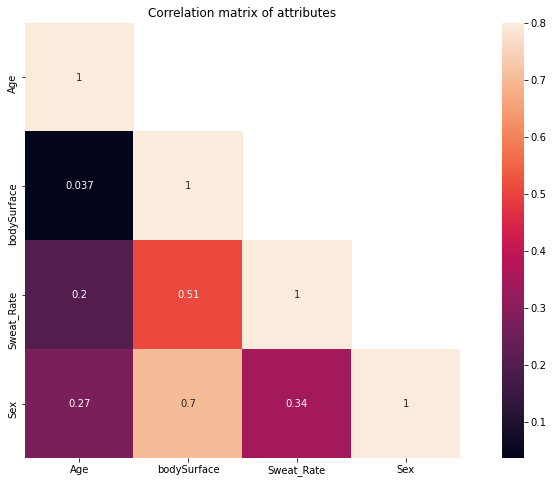

In [31]:
# Created the correlation matrix for variables
correMtr=sr_df2[["Age", "bodySurface", "Sweat_Rate", "Sex"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
# Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

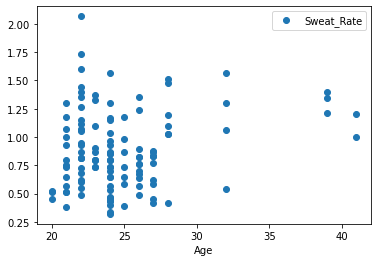

In [32]:
# Plot determining relationship between Age and Sweat Rate variable
sr_df2.plot(x = 'Age', y = 'Sweat_Rate', linestyle='none', marker='o') 
plt.show()

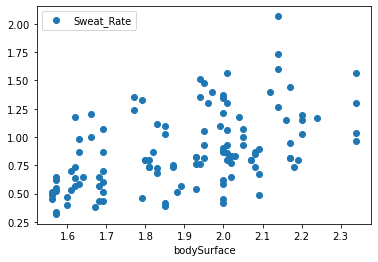

In [33]:
# Linear relationship between bodySurface and Sweat Rate variable
sr_df2.plot(x = 'bodySurface', y = 'Sweat_Rate', linestyle='none', marker='o') 
plt.show()

In [34]:
# Changed ID to string data type
sr_df2['ID'] = sr_df2['ID'].astype('str')

In [35]:
# Stored the final dataset to csv 
sr_df2.to_csv("C:\\Users\\priya\\OneDrive\\Documents\\final_swr.csv", index=False)

In [36]:
# Seprated independent (X) and dependent variables (y) to train the model
X=sr_df2.drop(['Sweat_Rate'],axis=1)
y=sr_df2['Sweat_Rate'].values.round(3)
print(X.shape,y.shape)

(121, 6) (121,)


In [37]:
# Defined metrics used to measure model accuracy
mae_scorer = make_scorer(mean_absolute_error, greater_is_better = False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Used ID column to create groups for leave one out cross validation
groups = sr_df2.ID

# Defined cross validation method
loo = LeaveOneGroupOut()

# Intialized linear regression model
model1 = LinearRegression()

In [38]:
# Adding calculated Variables in X_df
X['Age^2'] = X['Age']*X['Age']
X['Age^3'] = X['Age']*X['Age']*X['Age']
X['Age_bodySurface'] = X['Age'] *X['bodySurface'] 
X['Age^2_bodySurface'] = X['Age']*X['Age'] *X['bodySurface'] 

In [39]:
#Dropped ID column
X.drop(['ID','Weight','Height'],inplace = True, axis=1)

In [40]:
#Checked column name in X_train
X.columns

Index(['Age', 'Sex', 'bodySurface', 'Age^2', 'Age^3', 'Age_bodySurface',
       'Age^2_bodySurface'],
      dtype='object')

In [41]:
# Executed linear statistical model to help determine best combination of input variables based on AIC (Current model 
# has the lowest AIC)

model = sm.OLS(y, X)
fitted = model.fit()
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              196.5
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                    1.58e-60
Time:                        13:23:04   Log-Likelihood:                         -8.9772
No. Observations:                 121   AIC:                                      31.95
Df Residuals:                     114   BIC:                                      51.52
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [42]:
# Coefficients of model using leave one out cross validation
Tc_LR_coeff_mean = cross_validate(model1, X,y , cv=loo, n_jobs=-1, groups=groups,return_estimator=True)

Age = []
bodySurface=[]
sex = [] 
Age2=[]
Age_bodySurface=[]
Age3=[]
Age2bodySurface=[]
intercept = []
for model in Tc_LR_coeff_mean['estimator']:
    Age.append(model.coef_[0])
    bodySurface.append(model.coef_[2])
    Age2.append(model.coef_[3])
    Age_bodySurface.append(model.coef_[5])
    Age3.append(model.coef_[4])
    Age2bodySurface.append(model.coef_[6])
    sex.append(model.coef_[1])
    intercept.append(model.intercept_)

print("Age Coefficient =", round(statistics.mean(Age), 5))
print("bodySurface Coefficient =", round(statistics.mean(bodySurface), 5)) 
print("sex Coefficient =", round(statistics.mean(sex), 5)) 
print("Age2 Coefficient =", round(statistics.mean(Age2), 5)) 
print("Age_bodySurface Coefficient =", round(statistics.mean(Age_bodySurface), 5)) 
print("Age3 Coefficient =", statistics.mean(Age3)) 
print("Age2bodySurface Coefficient =", round(statistics.mean(Age2bodySurface), 5))
print("Intercept  =", round(statistics.mean(intercept), 5)) 

Age Coefficient = 0.05011
bodySurface Coefficient = 13.96646
sex Coefficient = -0.14765
Age2 Coefficient = 0.02903
Age_bodySurface Coefficient = -0.84128
Age3 Coefficient = -0.0005704300166020262
Age2bodySurface Coefficient = 0.01243
Intercept  = -10.9045


# Equation for Sweat Rate (SWR)

SWR = - 10.9045 + 0.05011*Age + 13.96646*BodySurface - 0.14765*Sex + 0.02903*Age^2  - 0.0005704300166019762*Age^3 - 0.84128*Age*BodySurface + 0.01243*Age^2* BodySurface

In [43]:
# Mean Absolute Error and Mean Squared Error Calculation for Polynomial (cubic) Model

bestmae_LR = cross_val_score(model1, X, y, scoring= mae_scorer, cv=loo, n_jobs=-1, groups=groups)
bestmse_LR = cross_val_score(model1, X, y, scoring= mse_scorer, cv=loo, n_jobs=-1, groups=groups)

# yhat: Predicted Sweat Rate from model using leave one out cross validation
sr_df2['yhat'] = cross_val_predict(model1,X, y,  cv=loo, n_jobs=-1, groups=groups)

print('Linear - Mean Absolute Error for Cubic features:', bestmae_LR.mean().round(3))
print('Linear - Mean Squared Error for Cubic features:', bestmse_LR.mean().round(3))

Linear - Mean Absolute Error for Cubic features: -0.246
Linear - Mean Squared Error for Cubic features: -0.096


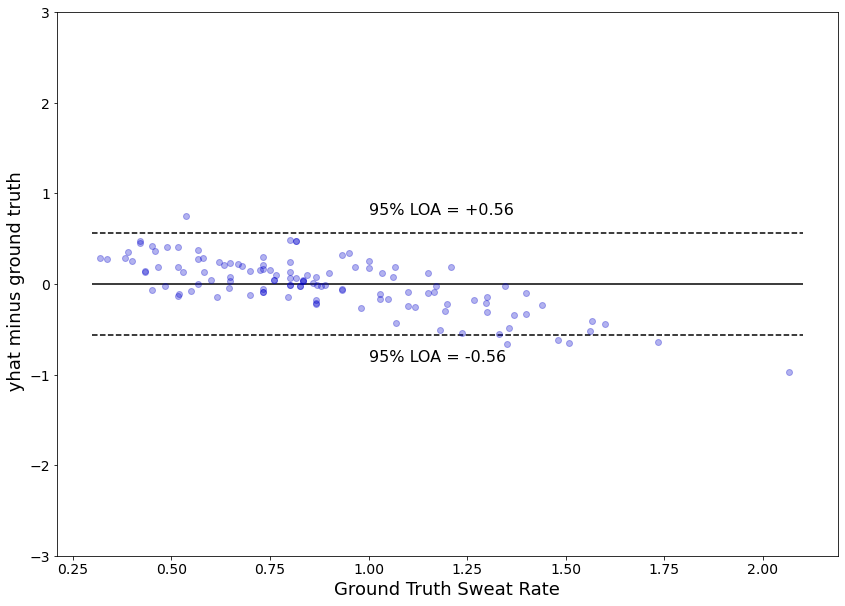

In [44]:
# Bland Altman Plot depecting the error calculation between yHat and ground truth Sweat Rate

sr_df2['Error'] = sr_df2['yhat'] - sr_df2['Sweat_Rate']
mean_bias = np.nanmean(sr_df2['Error'])
upper_limit = mean_bias + (1.96* (np.std(sr_df2['Error'])))
lower_limit = mean_bias - (1.96* (np.std(sr_df2['Error'])))
plt.figure(figsize=(14,10))
plt.plot(sr_df2.Sweat_Rate, sr_df2['Error'],'o',color='mediumblue',alpha=0.3)
plt.ylim(-3,3)
plt.hlines(y=mean_bias,xmin=np.min(sr_df2.Sweat_Rate.round(1)),xmax=np.max(sr_df2.Sweat_Rate.round(1)),linestyles='solid',color='black')
plt.hlines(y=upper_limit,xmin=np.min(sr_df2.Sweat_Rate.round(1)),xmax=np.max(sr_df2.Sweat_Rate.round(1)),linestyles='dashed',color='black')
plt.hlines(y=lower_limit,xmin=np.min(sr_df2.Sweat_Rate.round(1)),xmax=np.max(sr_df2.Sweat_Rate.round(1)),linestyles='dashed',color='black')

 

plt.ylabel(' yhat minus ground truth',size=18)
plt.xlabel('Ground Truth Sweat Rate',size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.annotate('95% LOA = +' + str(round(upper_limit,2)),(1,upper_limit+0.2),size=16)
plt.annotate('95% LOA = ' + str(round(lower_limit,2)),(1,lower_limit-0.3),size=16)
plt.show()
plt.close()